In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv('customer (1).csv')

In [3]:
customer_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809.0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643.0,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315.0,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735.0,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669.0,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
customer_data.shape

(10695, 11)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   float64
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 919.2+ KB


In [40]:
segmentation = customer_data['Segmentation']
customer_data = customer_data.drop(['ID','Segmentation'],axis=1)

In [7]:
customer_data.isnull().sum()

,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Var_1,108


Imputation: Replace missing numeric values with mean and missing categorical variables with mode

In [8]:
customer_data['Work_Experience'].mean().round()

3.0

In [9]:
customer_data['Work_Experience'].fillna(customer_data['Work_Experience'].mean().round(),inplace=True)

<ipython-input-9-c19002cbacbd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Work_Experience'].fillna(customer_data['Work_Experience'].mean().round(),inplace=True)


In [10]:
customer_data['Family_Size'].mean().round()

3.0

In [11]:
customer_data['Family_Size'].fillna(customer_data['Family_Size'].mean().round(),inplace=True)

<ipython-input-11-51dc1bf3ee52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Family_Size'].fillna(customer_data['Family_Size'].mean().round(),inplace=True)


In [12]:
# Get the mode value as a scalar
mode_Ever_Married_value = customer_data['Ever_Married'].mode()[0]

# Fill missing values with the mode
customer_data.loc[customer_data['Ever_Married'].isnull(), 'Ever_Married'] = mode_Ever_Married_value

In [13]:
# Get the mode value as a scalar
mode_Graduated_value = customer_data['Graduated'].mode()[0]

# Fill missing values with the mode
customer_data.loc[customer_data['Graduated'].isnull(), 'Graduated'] = mode_Graduated_value

In [14]:
# Get the mode value as a scalar
mode_Profession_value = customer_data['Profession'].mode()[0]

# Fill missing values with the mode
customer_data.loc[customer_data['Profession'].isnull(), 'Profession'] = mode_Profession_value

In [15]:
customer_data.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,108


Predict values of Var_1 using decision tree

In [16]:
#store all null Var_1 rows
missing_values = customer_data[customer_data['Var_1'].isnull()]
missing_values.shape

(108, 9)

In [17]:
#remove all null Var_1 values
customer_data= customer_data[customer_data['Var_1'].notna()]
customer_data.shape

(10587, 9)

Encode values for customer data so that we can use it in the decision tree algorithm

In [18]:
label_encoder = LabelEncoder()
customer_data['Gender']= label_encoder.fit_transform(customer_data['Gender'])
customer_data['Ever_Married']= label_encoder.fit_transform(customer_data['Ever_Married'])
customer_data['Graduated']= label_encoder.fit_transform(customer_data['Graduated'])
customer_data['Profession']= label_encoder.fit_transform(customer_data['Profession'])
customer_data['Spending_Score']= label_encoder.fit_transform(customer_data['Spending_Score'])


<ipython-input-18-d9aafe587bc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Gender']= label_encoder.fit_transform(customer_data['Gender'])
<ipython-input-18-d9aafe587bc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Ever_Married']= label_encoder.fit_transform(customer_data['Ever_Married'])
<ipython-input-18-d9aafe587bc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [19]:
missing_values['Gender']= label_encoder.fit_transform(missing_values['Gender'])
missing_values['Ever_Married']= label_encoder.fit_transform(missing_values['Ever_Married'])
missing_values['Graduated']= label_encoder.fit_transform(missing_values['Graduated'])
missing_values['Profession']= label_encoder.fit_transform(missing_values['Profession'])
missing_values['Spending_Score']= label_encoder.fit_transform(missing_values['Spending_Score'])

<ipython-input-19-abb992210353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['Gender']= label_encoder.fit_transform(missing_values['Gender'])
<ipython-input-19-abb992210353>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['Ever_Married']= label_encoder.fit_transform(missing_values['Ever_Married'])
<ipython-input-19-abb992210353>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Note: the data is first being predicted using customer data (i.e data we already have)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

   # Features (excluding 'Var_1')
features = customer_data.drop('Var_1', axis=1)

   # Target variable ('Var_1')
target = customer_data['Var_1']

   # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
       features, target, test_size=0.2, random_state=42
   )

In [21]:
# Create a decision tree classifier
model = DecisionTreeClassifier()

   # Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
missing_values = missing_values.drop('Var_1', axis=1)
predictions = model.predict(missing_values)
print(predictions)
predictions.shape

['Cat_3' 'Cat_4' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_3' 'Cat_4' 'Cat_6' 'Cat_3'
 'Cat_6' 'Cat_4' 'Cat_4' 'Cat_4' 'Cat_6' 'Cat_3' 'Cat_6' 'Cat_6' 'Cat_3'
 'Cat_3' 'Cat_4' 'Cat_2' 'Cat_6' 'Cat_6' 'Cat_3' 'Cat_6' 'Cat_3' 'Cat_6'
 'Cat_6' 'Cat_4' 'Cat_4' 'Cat_6' 'Cat_6' 'Cat_4' 'Cat_6' 'Cat_6' 'Cat_6'
 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_4' 'Cat_6'
 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_4' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6'
 'Cat_6' 'Cat_6' 'Cat_4' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6'
 'Cat_6' 'Cat_2' 'Cat_6' 'Cat_6' 'Cat_2' 'Cat_2' 'Cat_3' 'Cat_3' 'Cat_6'
 'Cat_3' 'Cat_6' 'Cat_7' 'Cat_6' 'Cat_2' 'Cat_6' 'Cat_4' 'Cat_6' 'Cat_4'
 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_2' 'Cat_6' 'Cat_6'
 'Cat_6' 'Cat_3' 'Cat_6' 'Cat_6' 'Cat_3' 'Cat_2' 'Cat_4' 'Cat_4' 'Cat_6'
 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_6' 'Cat_3' 'Cat_4' 'Cat_6' 'Cat_6' 'Cat_6']


(108,)

In [23]:
missing_values['Var_1'] = predictions
print(missing_values)

       Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
43          0             1   49          1           0              1.0   
163         0             0   32          0           5              1.0   
186         0             1   85          0           7              3.0   
231         0             0   23          0           5              0.0   
233         1             0   21          0           5              0.0   
...       ...           ...  ...        ...         ...              ...   
10161       0             1   49          0           2              0.0   
10168       1             1   72          1           6              9.0   
10281       1             0   19          0           5              1.0   
10304       1             0   33          0           5              8.0   
10555       1             1   47          1           4              0.0   

       Spending_Score  Family_Size  Var_1  
43                  2          2.0  Cat_3  

In [24]:
merged_df = pd.concat([customer_data, missing_values], ignore_index=True)

In [25]:
merged_df.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [26]:
merged_df.shape

(10695, 9)

In [27]:
merged_df['Var_1']= label_encoder.fit_transform(merged_df['Var_1'])

In [28]:
merged_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,3.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,3.0,1,6.0,5


Using spending score and Var_1 as the variables to calculate the optimum number of clusters

In [29]:
X = merged_df.iloc[:,[6,8]].values
print(X)

[[2 3]
 [0 3]
 [2 5]
 ...
 [2 5]
 [2 5]
 [1 5]]


Choosing the correct number of clusters

In [30]:
#finding the within clusters sum of squares

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

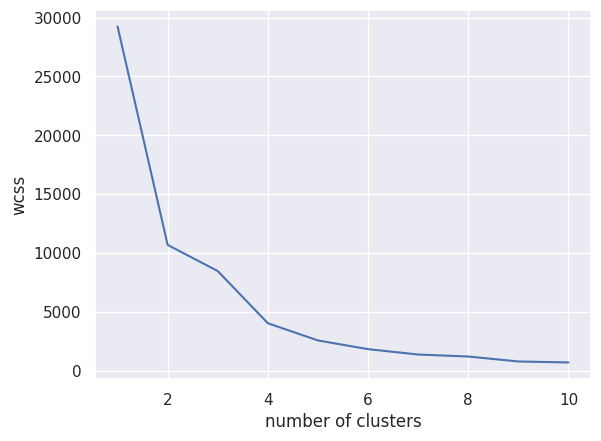

In [31]:
#scree plot
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

Optimum number of clusters = 4 (number of segementation clusters in data set is 4.)





Training the K-means clustering model

In [32]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y = kmeans.fit_predict(X)
print(y) # prints the cluster of each entry

[1 2 3 ... 3 3 0]


Compare with original segmentation

In [33]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
y = np.vectorize(mapping.get)(y)
print(y)
y.shape

['B' 'C' 'D' ... 'D' 'D' 'A']


(10695,)

In [53]:
result = y == segmentation
count = 0
for i in range(len(result)):
    if result[i] == True:
      count+=1
print("Similarity:" )
print((count/10695)*100)

Similarity:
26.35811126694717


# *Reflections*
The accuracy for predicting the original segmentation was very poor this could have been for a number of reasons:


*   The imputation methods for missing values could have been inaccurate
*   Decision tree may have been a poor choice to accuratley predict values of   
Var_1
*   Wrong features may have been used to find optimum number of cluster => wrong number of clusters chosen